In [1]:
!pip install kaggle


In [2]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d jangedoo/utkface-new

 96% 318M/331M [00:01<00:00, 168MB/s]
100% 331M/331M [00:05<00:00, 68.8MB/s]


In [5]:
import os

# Get the current working directory
current_directory = os.getcwd()

print("Current Directory:", current_directory)


Current Directory: /content


In [6]:
!unzip -q /content/utkface-new.zip -d /content/drive/MyDrive/NullClassProject/AgeGenderDetector/


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [5]:
fldr = '/content/drive/MyDrive/NullClassProject/AgeGenderDetector/UTKFace'


In [8]:
import os
files = os.listdir(fldr)

In [10]:
ages  = []
genders = []
images = []

for fle in files:
  age = int(fle.split('_')[0])
  gender = int(fle.split('_')[1])
  total = fldr+'/'+fle
  print(total)
  img = cv2.imread(total)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(48,48))
  images.append(img)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/NullClassProject/AgeGenderDetector/UTKFace/53_0_1_20170116191725055.jpg.chip.jpg
/content/drive/MyDrive/NullClassProject/AgeGenderDetector/UTKFace/53_0_1_20170116192938845.jpg.chip.jpg
/content/drive/MyDrive/NullClassProject/AgeGenderDetector/UTKFace/53_0_1_20170117181950281.jpg.chip.jpg
/content/drive/MyDrive/NullClassProject/AgeGenderDetector/UTKFace/53_0_1_20170120222553113.jpg.chip.jpg
/content/drive/MyDrive/NullClassProject/AgeGenderDetector/UTKFace/53_0_1_20170120222956787.jpg.chip.jpg
/content/drive/MyDrive/NullClassProject/AgeGenderDetector/UTKFace/53_0_1_20170120223004304.jpg.chip.jpg
/content/drive/MyDrive/NullClassProject/AgeGenderDetector/UTKFace/53_0_2_20170104210010763.jpg.chip.jpg
/content/drive/MyDrive/NullClassProject/AgeGenderDetector/UTKFace/53_0_2_20170112215433623.jpg.chip.jpg
/content/drive/MyDrive/NullClassProject/AgeGenderDetector/UTKFace/53_0_2_20170112221930338.jpg.chip.jpg
/content/driv

In [ ]:

for fle in files:
  age = int(fle.split('_')[0])
  gender  = int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)

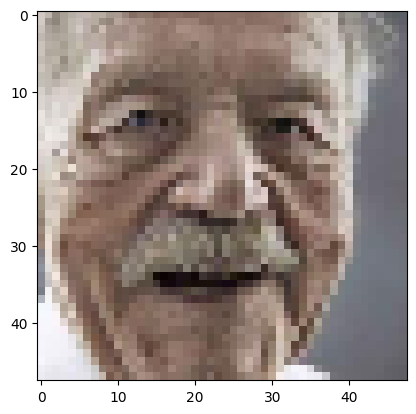

In [12]:
plt.imshow(images[0])

In [40]:
images_f = np.array(images)

In [13]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [14]:
np.save(fldr+'images.npy',images_f)
np.save(fldr+'genders.npy',genders_f)
np.save(fldr+'ages.npy',ages_f)

In [15]:
labels = []
i = 0
while i<len(ages):
  label = []
  label.append(ages[i])
  label.append(genders[i])
  labels.append(label)
  i = i+1


In [41]:
images_f_2 = images_f/255

In [16]:
images_f_2 = images_f/255
labels = np.array(labels)

In [17]:
images_f.shape

(23708, 48, 48, 3)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_f, labels, test_size=0.25, random_state=42)

In [19]:
y_train_2 = [y_train[:,1],y_train[:,0]]
y_test_2 = [y_test[:,1],y_test[:,0]]

In [20]:
y_train_2[0][:5]

array([1, 1, 0, 0, 0])

In [21]:
def convolution(input_tensor,filters):
  x = Conv2D(filters,kernel_size=(3,3),padding='same',strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
  x = Dropout(0.1)(x)
  x = Activation('relu')(x)
  return x



In [24]:
def model(input_shape):
  inputs = Input((input_shape))
  conv_1 = convolution(inputs,32)
  maxp_1 = MaxPool2D(pool_size=(2,2))(conv_1)
  conv_2 = convolution(maxp_1,64)
  maxp_2 = MaxPool2D(pool_size=(2,2))(conv_2)
  conv_3 = convolution(maxp_2,128)
  maxp_3 = MaxPool2D(pool_size=(2,2))(conv_3)
  conv_4 = convolution(maxp_3,256)
  maxp_4 = MaxPool2D(pool_size=(2,2))(conv_4)
  flatten = Flatten()(maxp_4)
  dense_1 = Dense(64,activation='relu')(flatten)
  dense_2 = Dense(64,activation='relu')(flatten)
  drop_1  = Dropout(0.2)(dense_1)
  drop_2 = Dropout(0.2)(dense_2)
  output_1 = Dense(1,activation='sigmoid',name='sex_out')(drop_1)
  output_2 = Dense(1,activation='relu',name='age_out')(drop_2)
  model = Model(inputs = [inputs],outputs = [output_1,output_2])
  model.compile(loss=['binary_crossentropy','mse'],optimizer='Adam',metrics=['accuracy'])
  return model







In [25]:
mdl = model((48,48,3))
mdl.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 48, 48, 32)           896       ['input_2[0][0]']             
                                                                                                  
 dropout_6 (Dropout)         (None, 48, 48, 32)           0         ['conv2d_4[0][0]']            
                                                                                                  
 activation_4 (Activation)   (None, 48, 48, 32)           0         ['dropout_6[0][0]']           
                                                                                            

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [29]:
fle_s = 'age_sex_detector.h5'
checkpoint = ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
early_stop = tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights=True)
callback_list = [checkpoint,early_stop]


In [33]:
History = mdl.fit(X_train,y_train_2,batch_size=64,validation_data=(X_test,y_test_2),epochs=250,callbacks=callback_list)


Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 263.1123 - sex_out_loss: 0.6252 - age_out_loss: 262.1205 - sex_out_accuracy: 0.6348 - age_out_accuracy: 0.0481
Epoch 1: val_loss improved from inf to 296.03036, saving model to age_sex_detector.h5
278/278 [==============================] - 6s 22ms/step - loss: 263.1123 - sex_out_loss: 0.6252 - age_out_loss: 262.1205 - sex_out_accuracy: 0.6348 - age_out_accuracy: 0.0481 - val_loss: 296.0304 - val_sex_out_loss: 0.5961 - val_age_out_loss: 295.0277 - val_sex_out_accuracy: 0.7187 - val_age_out_accuracy: 0.0450
Epoch 2/250
  5/278 [..............................] - ETA: 3s - loss: 190.3001 - sex_out_loss: 0.5777 - age_out_loss: 189.3153 - sex_out_accuracy: 0.6719 - age_out_accuracy: 0.0375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - ETA: 0s - loss: 192.2821 - sex_out_loss: 0.5763 - age_out_loss: 191.2714 - sex_out_accuracy: 0.6796 - age_out_accuracy: 0.0480
Epoch 2: val_loss improved from 296.03036 to 274.82245, saving model to age_sex_detector.h5
278/278 [==============================] - 4s 15ms/step - loss: 192.2821 - sex_out_loss: 0.5763 - age_out_loss: 191.2714 - sex_out_accuracy: 0.6796 - age_out_accuracy: 0.0480 - val_loss: 274.8224 - val_sex_out_loss: 0.5696 - val_age_out_loss: 273.7925 - val_sex_out_accuracy: 0.7388 - val_age_out_accuracy: 0.0447
Epoch 3/250
277/278 [============================>.] - ETA: 0s - loss: 161.3401 - sex_out_loss: 0.5494 - age_out_loss: 160.3038 - sex_out_accuracy: 0.6959 - age_out_accuracy: 0.0464
Epoch 3: val_loss improved from 274.82245 to 160.61533, saving model to age_sex_detector.h5
278/278 [==============================] - 5s 18ms/step - loss: 161.6535 - sex_out_loss: 0.5495 - age_out_loss: 160.6171 - sex_out_accuracy: 0.6956 - 

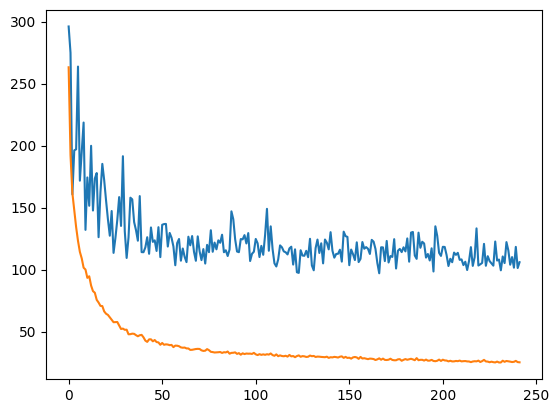

In [34]:
plt.plot(History.history['val_loss'])
plt.plot(History.history['loss'])


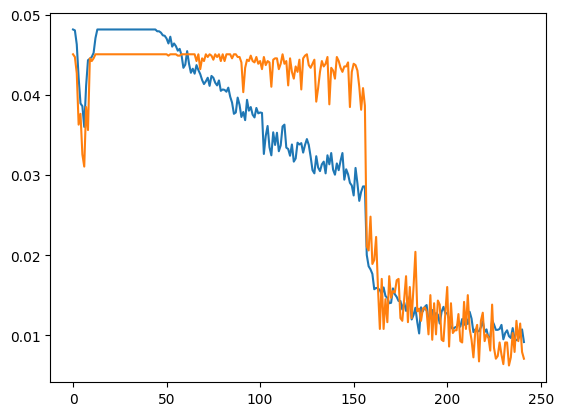

In [35]:
plt.plot(History.history['age_out_accuracy'])
plt.plot(History.history['val_age_out_accuracy'])

In [37]:
mdl.evaluate(X_train,y_train_2)

556/556 [==============================] - 3s 4ms/step - loss: 24.3224 - sex_out_loss: 0.2249 - age_out_loss: 19.0270 - sex_out_accuracy: 0.9097 - age_out_accuracy: 0.0082


[24.322429656982422,
 0.22492387890815735,
 19.026954650878906,
 0.9097350835800171,
 0.008154772222042084]

In [2]:
def test_img(ind,images_f,images_f_2,mdl):
  plt.imshow(images_f[ind])
  test_img = images_f_2[ind]
  pred_1 = mdl.predict(np.array([test_img]))
  sex_f = ['Male','Female']
  age = int(np.round(pred_1[1][0]))
  sex = int(np.round(pred_1[0][0]))
  print('Predicted age is: ' +  str(age))
  print('Predicted sex is:  '+  sex_f[sex])




In [3]:
test_img(12,images_f,images_f_2,pickled_model)

NameError: name 'images_f' is not defined

In [49]:
import pickle

In [50]:
pickle.dump(mdl, open('model_age_gender.pkl', 'wb'))

In [51]:
pickled_model = pickle.load(open('/content/model_age_gender.pkl', 'rb'))
pickled_model.predict(X_test)

186/186 [==============================] - 1s 4ms/step


[array([[0.21483383],
        [0.99122775],
        [0.93349   ],
        ...,
        [0.02655564],
        [0.99204797],
        [0.9843016 ]], dtype=float32),
 array([[46.630623],
        [18.839523],
        [21.13974 ],
        ...,
        [37.355118],
        [21.048096],
        [30.177376]], dtype=float32)]

In [18]:
from google.colab import files
from PIL import Image
import IPython.display as display

# Upload an image file
uploaded_file = files.upload()

# Display the uploaded image
if uploaded_file:
    image_path = list(uploaded_file.keys())[0]
    image = cv2.imread(image_path)
    cv2.imshow(image)
    img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(48,48))
    img = img/255
    pred_1 = pickled_model.predict(np.array([img]))
    sex_f = ['Male','Female']
    age = int(np.round(pred_1[1][0]))
    sex = int(np.round(pred_1[0][0]))
    print('Predicted age is: ' +  str(age))
    print('Predicted sex is:  '+  sex_f[sex])




Saving 1_0_2_20161219161843718.jpg.chip.jpg to 1_0_2_20161219161843718.jpg.chip (1).jpg


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


Saving imgt6.jpg to imgt6.jpg


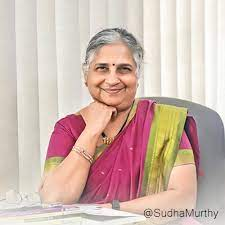

1/1 [==============================] - 0s 24ms/step
Predicted age is: 69
Predicted sex is: Male


In [28]:
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Upload an image file
uploaded_file = files.upload()

# Display the uploaded image
if uploaded_file:
    image_path = list(uploaded_file.keys())[0]
    image = cv2.imread(image_path)
    cv2_imshow(image)

    img = cv2.resize(image, (48, 48))
    img = img / 255

    # Replace 'pickled_model' with the actual loaded model
    pred_1 = pickled_model.predict(np.array([img]))
    sex_f = ['Male', 'Female']
    age = int(np.round(pred_1[1][0]))
    sex = int(np.round(pred_1[0][0]))
    print('Predicted age is:', age)
    print('Predicted sex is:', sex_f[sex])


In [15]:
import pickle

In [17]:
pickled_model = pickle.load(open('/content/model_age_gender.pkl', 'rb'))

In [ ]:
  age = int(fle.split('_')[0])
  gender = int(fle.split('_')[1])
  total = fldr+'/'+fle
  print(total)
  img = cv2.imread(total)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(48,48))
  images.append(img)